Calculator

In [2]:
def calculator():
    print("Simple Calculator")
    print("Operations: +, -, *, /\n")

    while True:
        try:
            num1 = float(input("Enter first number: "))
            operator = input("Enter operator (+, -, *, /): ")
            num2 = float(input("Enter second number: "))
        except ValueError:
            print("Invalid input. Please enter numbers.")
            continue

        result = None
        if operator == '+':
            result = num1 + num2
        elif operator == '-':
            result = num1 - num2
        elif operator == '*':
            result = num1 * num2
        elif operator == '/':
            if num2 == 0:
                print("Error: Division by zero is not allowed.")
                continue
            result = num1 / num2
        else:
            print("Invalid operator. Please use +, -, *, or /.")
            continue

        print(f"Result: {num1} {operator} {num2} = {result}")

        another_calculation = input("Do you want to perform another calculation? (yes/no): ").lower()
        if another_calculation != 'yes':
            break
calculator()

Simple Calculator
Operations: +, -, *, /

Enter first number: 2
Enter operator (+, -, *, /): +
Enter second number: 5
Result: 2.0 + 5.0 = 7.0
Do you want to perform another calculation? (yes/no): yes
Enter first number: 6
Enter operator (+, -, *, /): -
Enter second number: 3
Result: 6.0 - 3.0 = 3.0
Do you want to perform another calculation? (yes/no): no


# **Cybersecurity anomaly detection pipelin**

Generating synthetic data...


/tmp/ipython-input-1703421421.py:47: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  start_time = datetime.utcnow()


Preprocessing & engineering features...
Training IsolationForest on benign data...
Training Autoencoder on benign data...
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.5610 - val_loss: 0.3841
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2572 - val_loss: 0.1669
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0868 - val_loss: 0.0987
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0433 - val_loss: 0.0548
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - val_loss: 0.0508
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - val_loss: 0.0303
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0230 - val_loss: 0.0233
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0209
Epoch 9/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - val_loss: 0.0162
Epoch 10/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - val_loss: 0.0188
ALERTS: 1 events above threshold=70


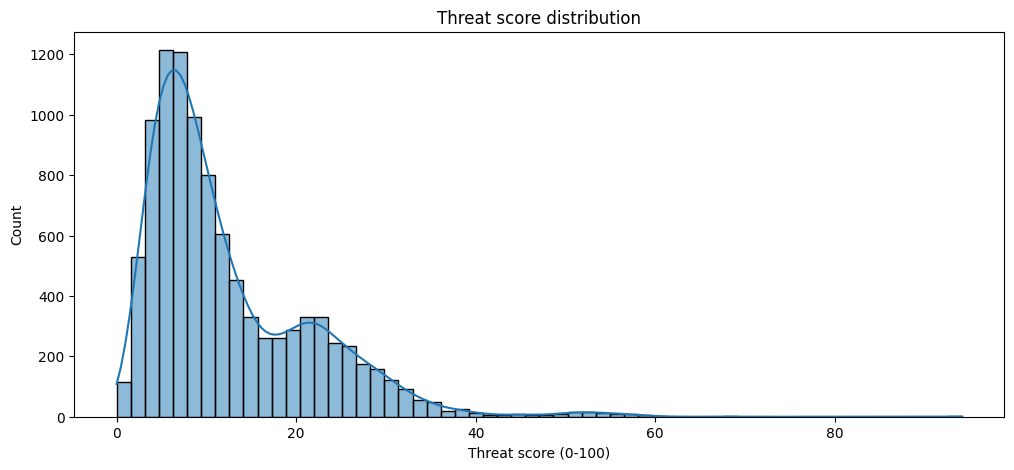

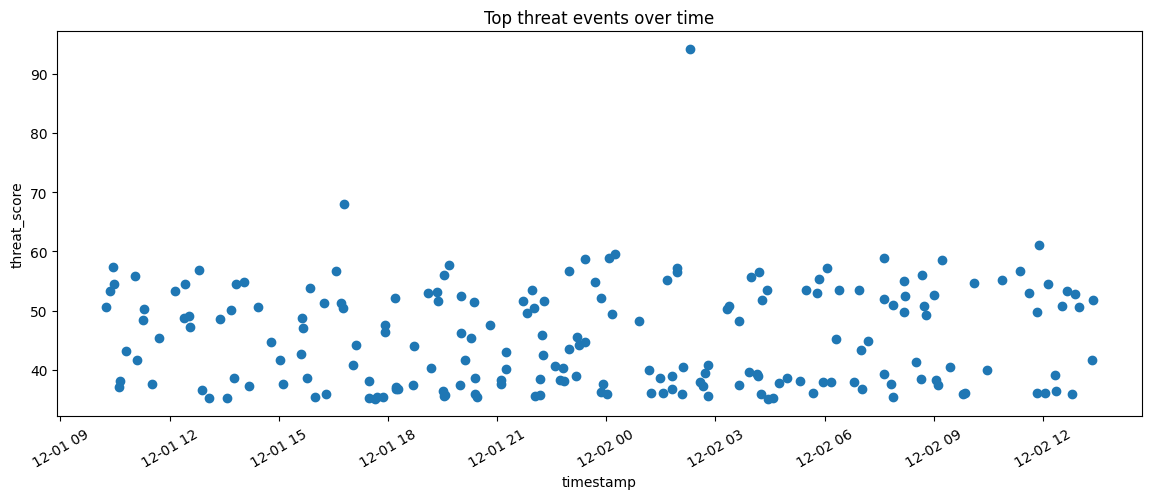

Evaluation - AUC: 1.000, Precision: 1.000, Recall: 0.010, F1: 0.020
Alerts detected, but save_models=False — not writing alerts.csv
Done.


In [8]:
"""
Comprehensive cybersecurity anomaly detection pipeline (synthetic data).
Features:
- Generate synthetic network+host telemetry
- Preprocess & feature engineering
- Train two anomaly models: IsolationForest + Autoencoder (Keras)
- Compute threat scoring, alerting, visualization

Usage: run the script or import functions. Requires: scikit-learn, pandas, numpy, matplotlib, seaborn, tensorflow (or keras).
"""

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

try:
    import tensorflow as tf
    from tensorflow.keras import layers, models
    TF_AVAILABLE = True
except Exception:
    TF_AVAILABLE = False

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


def generate_synthetic_telemetry(n_records=20000, start_time=None, malicious_fraction=0.02):

    if start_time is None:
        start_time = datetime.utcnow()

    timestamps = [start_time + timedelta(seconds=int(x)) for x in np.random.exponential(scale=10, size=n_records).cumsum()]

    def rand_ip(n):
        return [f"10.{np.random.randint(0,256)}.{np.random.randint(0,256)}.{np.random.randint(1,255)}" for _ in range(n)]

    src_ips = rand_ip(n_records)
    dst_ips = rand_ip(n_records)

    src_ports = np.random.randint(1024, 65535, size=n_records)
    dst_ports = np.random.choice([22, 80, 443, 3389, 53, 8080, 3306, 445], size=n_records, p=[0.05,0.25,0.25,0.01,0.05,0.15,0.14,0.10])
    protocols = np.random.choice(['TCP','UDP','ICMP'], size=n_records, p=[0.85,0.12,0.03])

    bytes_sent = np.random.lognormal(mean=7, sigma=1.2, size=n_records).astype(int)
    packets = np.maximum(1, (bytes_sent / np.random.uniform(200,1200,size=n_records)).astype(int))
    duration = np.abs(np.random.normal(loc=30, scale=60, size=n_records))

    flags = np.random.choice([0,1,2,3], size=n_records, p=[0.8,0.15,0.04,0.01])

    failed_logins = np.random.poisson(0.05, size=n_records)
    cpu_usage = np.clip(np.random.normal(20, 10, size=n_records), 0, 100)
    mem_usage = np.clip(np.random.normal(30, 15, size=n_records), 0, 100)
    process_count = np.random.poisson(80, size=n_records)
    user_agent_len = np.random.randint(20, 200, size=n_records)

    df = pd.DataFrame({
        'timestamp': timestamps,
        'src_ip': src_ips,
        'dst_ip': dst_ips,
        'src_port': src_ports,
        'dst_port': dst_ports,
        'protocol': protocols,
        'bytes': bytes_sent,
        'packets': packets,
        'duration': duration,
        'flags': flags,
        'failed_logins': failed_logins,
        'cpu_usage': cpu_usage,
        'mem_usage': mem_usage,
        'process_count': process_count,
        'user_agent_len': user_agent_len,
    })

    n_mal = max(1, int(n_records * malicious_fraction))
    mal_idx = np.random.choice(df.index, size=n_mal, replace=False)

    df.loc[mal_idx, 'bytes'] = df.loc[mal_idx, 'bytes'] * np.random.randint(10,100, size=n_mal)
    df.loc[mal_idx, 'packets'] = df.loc[mal_idx, 'packets'] * np.random.randint(5,50, size=n_mal)
    df.loc[mal_idx, 'failed_logins'] = df.loc[mal_idx, 'failed_logins'] + np.random.randint(3,20, size=n_mal)
    df.loc[mal_idx, 'flags'] = 3
    df.loc[mal_idx, 'cpu_usage'] = np.clip(df.loc[mal_idx, 'cpu_usage'] + np.random.randint(30,80,size=n_mal), 0, 100)
    df.loc[mal_idx, 'mem_usage'] = np.clip(df.loc[mal_idx, 'mem_usage'] + np.random.randint(20,60,size=n_mal), 0, 100)

    df['label'] = 0
    df.loc[mal_idx, 'label'] = 1

    return df


def preprocess_and_engineer(df, fit_transformer=None):

    df = df.copy()
    df['hour'] = df['timestamp'].dt.hour
    df['minute'] = df['timestamp'].dt.minute
    df['dayofweek'] = df['timestamp'].dt.dayofweek

    for col in ['src_ip', 'dst_ip']:
        counts = df[col].value_counts()
        df[f'{col}_count'] = df[col].map(counts)

    numeric_features = ['bytes','packets','duration','flags','failed_logins','cpu_usage','mem_usage','process_count','user_agent_len','src_ip_count','dst_ip_count','hour','minute','dayofweek']
    categorical_features = ['protocol']

    if fit_transformer is None:
        ct = ColumnTransformer([
            ('num', StandardScaler(), numeric_features),
            ('proto', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
        ])
        X = ct.fit_transform(df)
        return X, ct
    else:
        X = fit_transformer.transform(df)
        return X, fit_transformer



def train_isolation_forest(X_train, n_estimators=200):
    clf = IsolationForest(n_estimators=n_estimators, contamination='auto', random_state=RANDOM_STATE)
    clf.fit(X_train)
    return clf


def build_autoencoder(input_dim, encoding_dim=32):
    if not TF_AVAILABLE:
        raise RuntimeError('TensorFlow not available. Install tensorflow to use the autoencoder component.')
    inp = layers.Input(shape=(input_dim,))
    x = layers.Dense(encoding_dim*4, activation='relu')(inp)
    x = layers.Dense(encoding_dim*2, activation='relu')(x)
    z = layers.Dense(encoding_dim, activation='relu')(x)
    x = layers.Dense(encoding_dim*2, activation='relu')(z)
    x = layers.Dense(encoding_dim*4, activation='relu')(x)
    out = layers.Dense(input_dim, activation='linear')(x)
    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer='adam', loss='mse')
    return model



def compute_threat_score(df, iso_clf=None, ae_model=None, transformer=None):
    X, _ = preprocess_and_engineer(df, fit_transformer=transformer)

    results = df.copy()

    if iso_clf is not None:
        iso_raw = iso_clf.decision_function(X)
        iso_anom = -iso_raw
        results['iso_score'] = (iso_anom - iso_anom.min()) / (iso_anom.max() - iso_anom.min() + 1e-9)
    else:
        results['iso_score'] = 0.0

    if ae_model is not None and TF_AVAILABLE:
        recon = ae_model.predict(X, verbose=0)
        mse = np.mean(np.square(X - recon), axis=1)
        results['ae_recon_error'] = (mse - mse.min()) / (mse.max() - mse.min() + 1e-9)
    else:
        results['ae_recon_error'] = 0.0
    results['threat_score_raw'] = 0.6 * results['iso_score'] + 0.4 * results['ae_recon_error']
    results['threat_score'] = (results['threat_score_raw'] * 100).clip(0,100)

    return results


def generate_alerts(results_df, threshold=70):
    """Return alerts for rows with threat_score >= threshold. Also prints summary.
    """
    alerts = results_df[results_df['threat_score'] >= threshold].copy()
    if alerts.empty:
        print(f"No alerts (threshold={threshold}).")
    else:
        print(f"ALERTS: {len(alerts)} events above threshold={threshold}")
        display_cols = ['timestamp','src_ip','dst_ip','dst_port','protocol','bytes','packets','failed_logins','threat_score']
        print(alerts[display_cols].sort_values('threat_score', ascending=False).head(20).to_string(index=False))
    return alerts


def visualize_results(results_df, save_path=None):
    plt.figure(figsize=(12,5))
    sns.histplot(results_df['threat_score'], bins=60, kde=True)
    plt.title('Threat score distribution')
    plt.xlabel('Threat score (0-100)')
    if save_path:
        plt.savefig(os.path.join(save_path, 'threat_score_distribution.png'))
    plt.show()

    top = results_df.sort_values('threat_score', ascending=False).head(200)
    plt.figure(figsize=(14,5))
    plt.scatter(top['timestamp'], top['threat_score'])
    plt.title('Top threat events over time')
    plt.xlabel('timestamp')
    plt.ylabel('threat_score')
    plt.xticks(rotation=30)
    if save_path:
        plt.savefig(os.path.join(save_path, 'top_threats_timeseries.png'))
    plt.show()


def run_example_pipeline(n_records=20000, malicious_fraction=0.02, save_models=True, model_dir='models'):
    print('Generating synthetic data...')
    df = generate_synthetic_telemetry(n_records=n_records, malicious_fraction=malicious_fraction)
    print('Preprocessing & engineering features...')
    X, transformer = preprocess_and_engineer(df)
    if 'label' in df.columns:
        X_train = X[df['label']==0]
        X_test = X
    else:
        X_train, X_test = train_test_split(X, test_size=0.3, random_state=RANDOM_STATE)

    print('Training IsolationForest on benign data...')
    iso = train_isolation_forest(X_train)

    ae = None
    if TF_AVAILABLE:
        print('Training Autoencoder on benign data...')
        ae = build_autoencoder(input_dim=X_train.shape[1], encoding_dim=32)
        ae.fit(X_train, X_train, epochs=10, batch_size=256, validation_split=0.1, verbose=1)

    results = compute_threat_score(df, iso_clf=iso, ae_model=ae, transformer=transformer)

    alerts = generate_alerts(results, threshold=70)

    visualize_results(results, save_path=None)

    if 'label' in results.columns:
        preds = (results['threat_score'] >= 70).astype(int)
        auc = roc_auc_score(results['label'], results['threat_score']/100.0)
        prec, recall, f1, _ = precision_recall_fscore_support(results['label'], preds, average='binary', zero_division=0)
        print(f"Evaluation - AUC: {auc:.3f}, Precision: {prec:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

    if save_models:
        os.makedirs(model_dir, exist_ok=True)
        joblib.dump(iso, os.path.join(model_dir, 'isolation_forest.joblib'))
        joblib.dump(transformer, os.path.join(model_dir, 'preprocessor.joblib'))
        if ae is not None and TF_AVAILABLE:
            ae.save(os.path.join(model_dir, 'autoencoder.h5'))
        print('Models saved to', model_dir)

    if not alerts.empty:
        if save_models:
            os.makedirs(model_dir, exist_ok=True)
            alerts.to_csv(os.path.join(model_dir, 'alerts.csv'), index=False)
            print('Saved alerts.csv')
        else:
            print('Alerts detected, but save_models=False — not writing alerts.csv')

    return results, alerts, {'isolation_forest': iso, 'autoencoder': ae, 'transformer': transformer}

if __name__ == '__main__':
    results, alerts, artifacts = run_example_pipeline(n_records=10000, malicious_fraction=0.01, save_models=False)
    print('Done.')
